In [143]:
import pandas as pd

df = pd.read_csv('gpa_data_cleaned.csv')
df.drop('Unnamed: 0', axis=1)

,Time,State,Major,Programming Age,Private School,Scholarship,Tech Parents,Study With Friends,Take Notes,Last Sem Credits,Avg Screentime,Avg Distraction Time,Hours of Sleep,Last Sem GPA,Last Year GPA
0,11/5/2024 14:57:00,NJ,Computer Science,14.0,No,NaN,No parents,Sometimes,"Yes, on a tablet",16,5.0,2.0,7.0,2.780,2.600
1,11/5/2024 14:57:33,VA,Computer Science,8.0,No,Partial,Two parents,Sometimes,"Yes, on paper",17,3.5,1.0,7.0,3.900,3.700
2,11/5/2024 14:57:41,MD,Computer Science,14.0,No,Partial,No parents,Frequently,"Yes, on paper",17,6.5,2.0,8.0,3.900,4.000
3,11/5/2024 14:57:50,VA,Computer Science,14.0,No,Partial,One parent,Frequently,"Yes, on paper",18,6.0,2.0,8.0,4.000,4.000
4,11/5/2024 14:57:54,CA,"Data, Government and Politics",11.0,No,Partial,Two parents,Frequently,"Yes, on a computer",15,5.0,1.0,8.0,4.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,11/14/2024 12:51:59,MD,Computer Science,16.0,No,NaN,One parent,Sometimes,"Yes, on paper",15,5.5,1.0,8.0,3.557,3.504
57,11/14/2024 17:37:45,MD,Computer Science,15.0,No,Full,No parents,Never,"Yes, on paper",17,10.0,1.0,8.0,4.000,4.000
58,11/14/2024 20:44:54,MD,Computer Science,17.0,No,NaN,No parents,Never,"Yes, on paper",16,5.0,2.0,5.0,3.500,3.700
59,11/15/2024 13:21:20,NJ,Computer Science,15.0,No,NaN,One parent,Frequently,"Yes, on paper",17,9.0,3.0,6.0,3.894,3.940


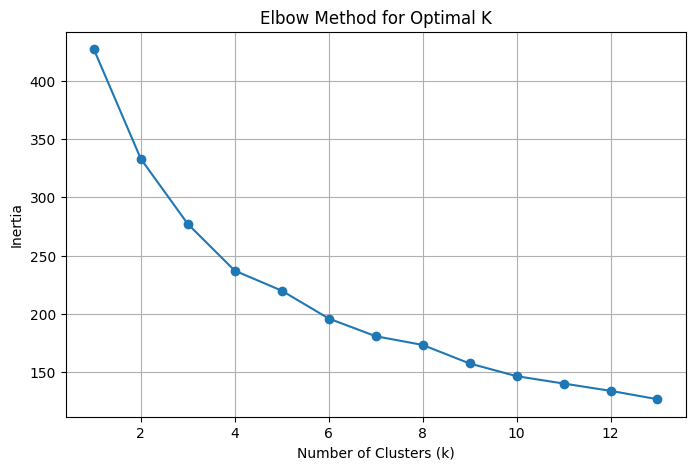

,Programming Age,Last Sem Credits,Avg Screentime,Avg Distraction Time,Hours of Sleep,Last Sem GPA,Last Year GPA,Cluster
0,14.0,16,5.0,2.0,7.0,2.780,2.600,2
1,8.0,17,3.5,1.0,7.0,3.900,3.700,0
2,14.0,17,6.5,2.0,8.0,3.900,4.000,0
3,14.0,18,6.0,2.0,8.0,4.000,4.000,0
4,11.0,15,5.0,1.0,8.0,4.000,4.000,0
...,...,...,...,...,...,...,...,...
56,16.0,15,5.5,1.0,8.0,3.557,3.504,2
57,15.0,17,10.0,1.0,8.0,4.000,4.000,0
58,17.0,16,5.0,2.0,5.0,3.500,3.700,2
59,15.0,17,9.0,3.0,6.0,3.894,3.940,1


In [144]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Selecting relevant numerical columns for clustering
numerical_columns = [
    "Programming Age",
    "Last Sem Credits",
    "Avg Screentime",
    "Avg Distraction Time",
    "Hours of Sleep",
    "Last Sem GPA",
    "Last Year GPA"
]

# Handling missing values by dropping rows with NaNs in the selected columns
cleaned_data = df[numerical_columns].dropna()

# Standardizing the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 14)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Applying KMeans with an optimal number of clusters (assume k=3 based on visual analysis)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original cleaned data
cleaned_data_with_clusters = cleaned_data.copy()
cleaned_data_with_clusters['Cluster'] = cluster_labels


cleaned_data_with_clusters

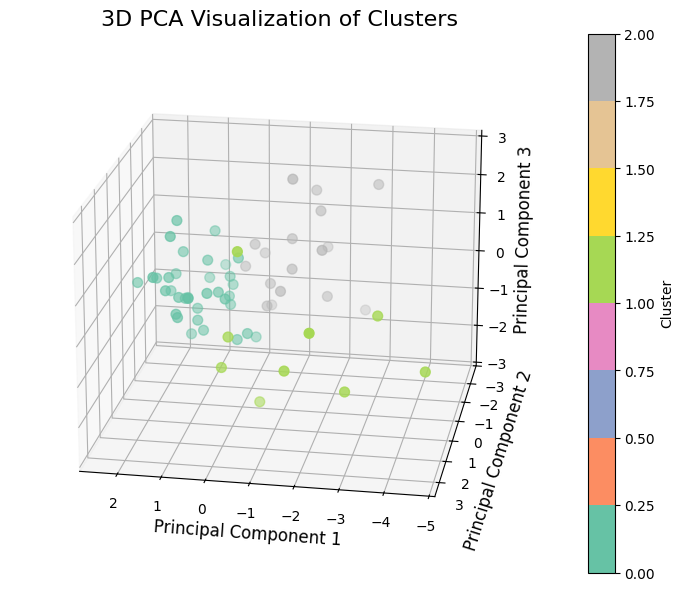

In [119]:
from mpl_toolkits.mplot3d import Axes3D

# Performing PCA to reduce data to 3 components
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(scaled_data)

# Creating a DataFrame for 3D PCA components and cluster labels
pca_3d_df = pd.DataFrame(pca_3d_data, columns=["PCA1", "PCA2", "PCA3"])
pca_3d_df["Cluster"] = cluster_labels

# Plotting the 3D PCA visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_3d_df["PCA1"],
    pca_3d_df["PCA2"],
    pca_3d_df["PCA3"],
    c=pca_3d_df["Cluster"],
    cmap="Set2",
    s=50
)

# Adding titles and labels
ax.set_title("3D PCA Visualization of Clusters", fontsize=16)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
ax.view_init(elev=20, azim=100) 
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()


In [123]:
cleaned_data_with_clusters[cleaned_data_with_clusters['Cluster'] == 2]['Last Sem GPA'].mean()

np.float64(3.3126470588235293)

/var/folders/rz/twm3nfx14_379nlt_mj5qb3w0000gn/T/ipykernel_67388/4165411163.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


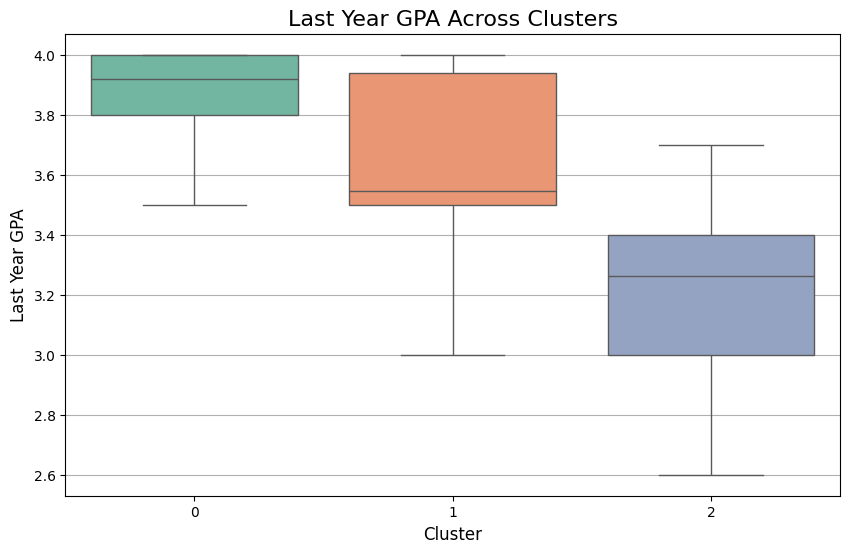

/var/folders/rz/twm3nfx14_379nlt_mj5qb3w0000gn/T/ipykernel_67388/4165411163.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


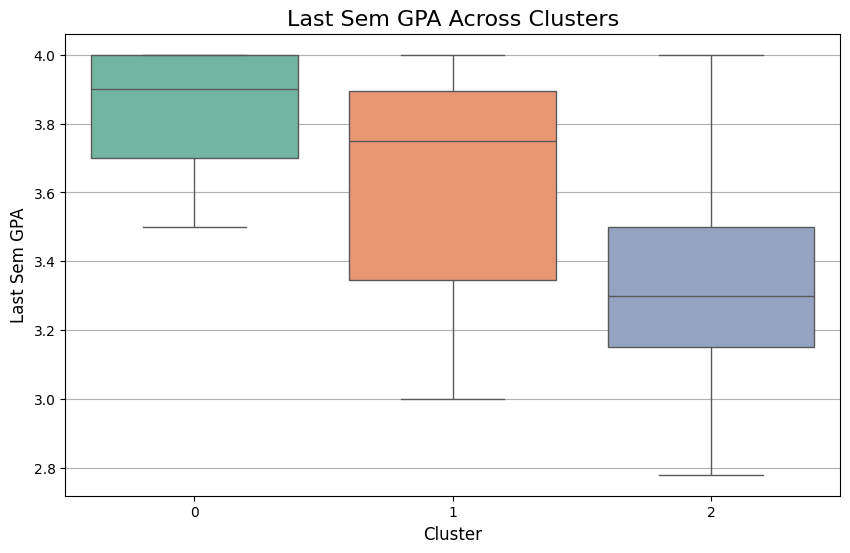

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = 'Last Year GPA'
feature2 = 'Last Sem GPA'

# Plotting a boxplot for hours of sleep distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cleaned_data_with_clusters,
    x="Cluster",
    y=feature1,
    palette="Set2"
)
plt.title(f"{feature1} Across Clusters", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel(feature1, fontsize=12)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cleaned_data_with_clusters,
    x="Cluster",
    y=feature2,
    palette="Set2"
)
plt.title(f"{feature2} Across Clusters", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.grid(axis='y')
plt.show()

/var/folders/rz/twm3nfx14_379nlt_mj5qb3w0000gn/T/ipykernel_67388/1666226029.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


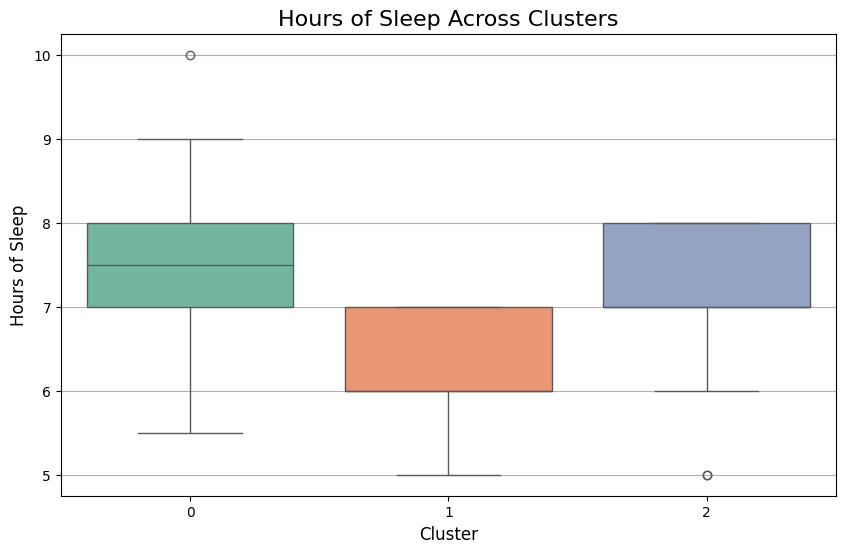

/var/folders/rz/twm3nfx14_379nlt_mj5qb3w0000gn/T/ipykernel_67388/1666226029.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


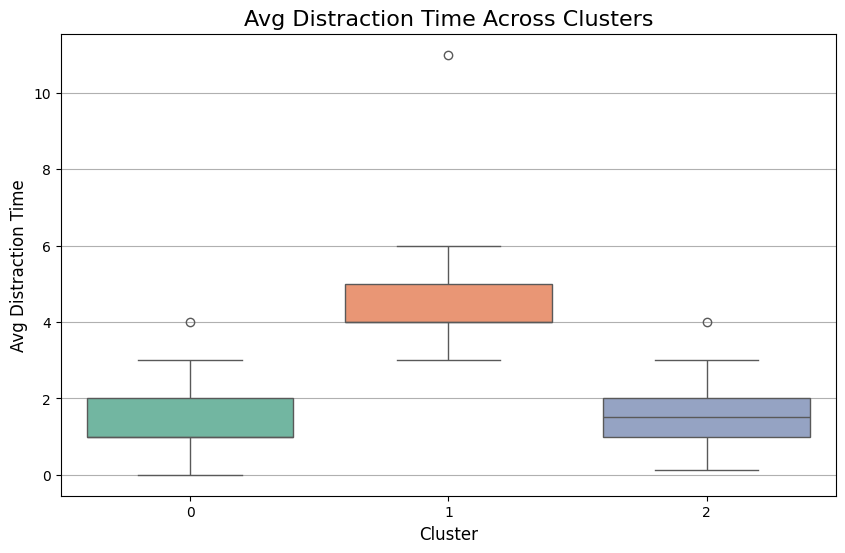

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = 'Hours of Sleep'
feature2 = 'Avg Distraction Time'

# Plotting a boxplot for hours of sleep distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cleaned_data_with_clusters,
    x="Cluster",
    y=feature1,
    palette="Set2"
)
plt.title(f"{feature1} Across Clusters", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel(feature1, fontsize=12)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cleaned_data_with_clusters,
    x="Cluster",
    y=feature2,
    palette="Set2"
)
plt.title(f"{feature2} Across Clusters", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.grid(axis='y')
plt.show()

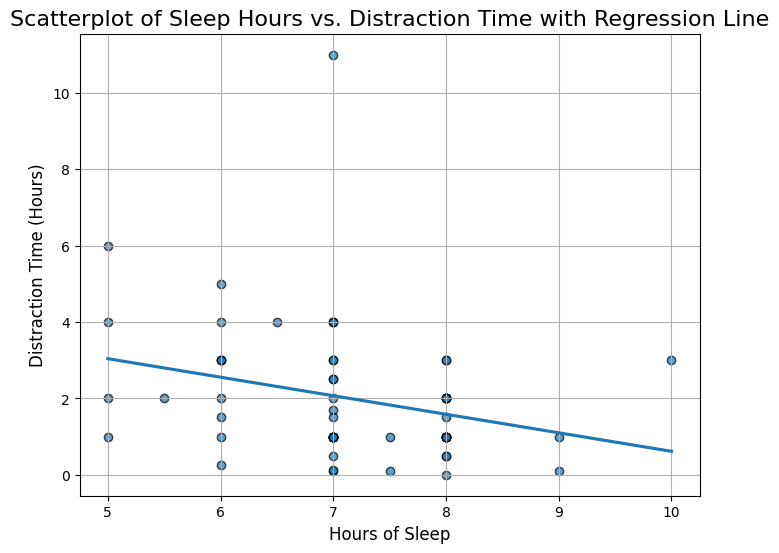

Pearson Correlation Coefficient: -0.2819196719685812
P-Value: 0.02772400783903221


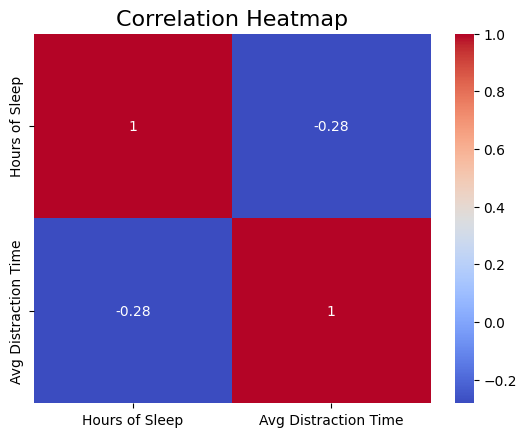

The correlation is statistically significant.


In [147]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the relevant columns for sleep and distraction time
sleep_hours = cleaned_data_with_clusters[cleaned_data_with_clusters[]]["Hours of Sleep"].dropna()
distraction_time = cleaned_data_with_clusters["Avg Distraction Time"].dropna()

# Check for linearity with a scatterplot
plt.figure(figsize=(8, 6))
sns.regplot(x=sleep_hours, y=distraction_time, ci=None, scatter_kws={'alpha': 0.7, 'edgecolors': 'k'})
plt.title("Scatterplot of Sleep Hours vs. Distraction Time with Regression Line", fontsize=16)
plt.xlabel("Hours of Sleep", fontsize=12)
plt.ylabel("Distraction Time (Hours)", fontsize=12)
plt.grid(True)
plt.show()

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(sleep_hours, distraction_time)

# Display results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

# Enhanced visualization of correlation with a heatmap
correlation_matrix = np.corrcoef(sleep_hours, distraction_time)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=["Hours of Sleep", "Avg Distraction Time"], yticklabels=["Hours of Sleep", "Avg Distraction Time"])
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Interpretation guidance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")
